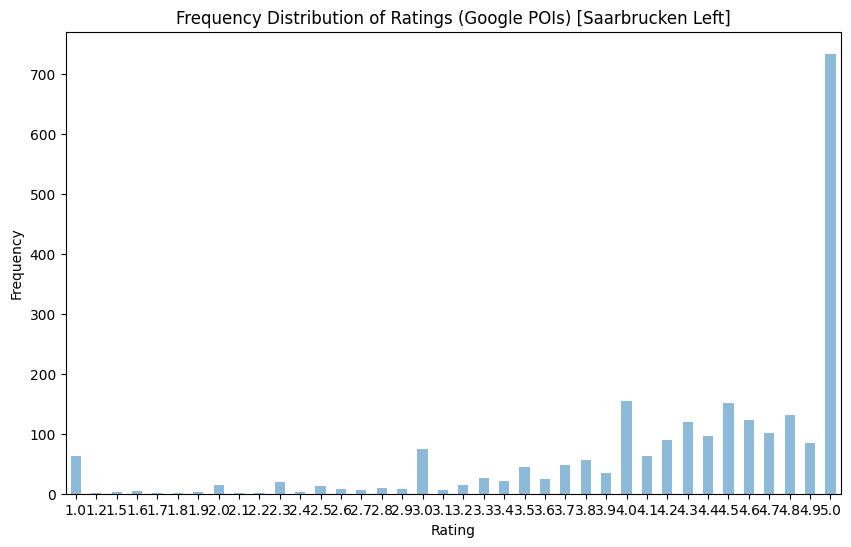

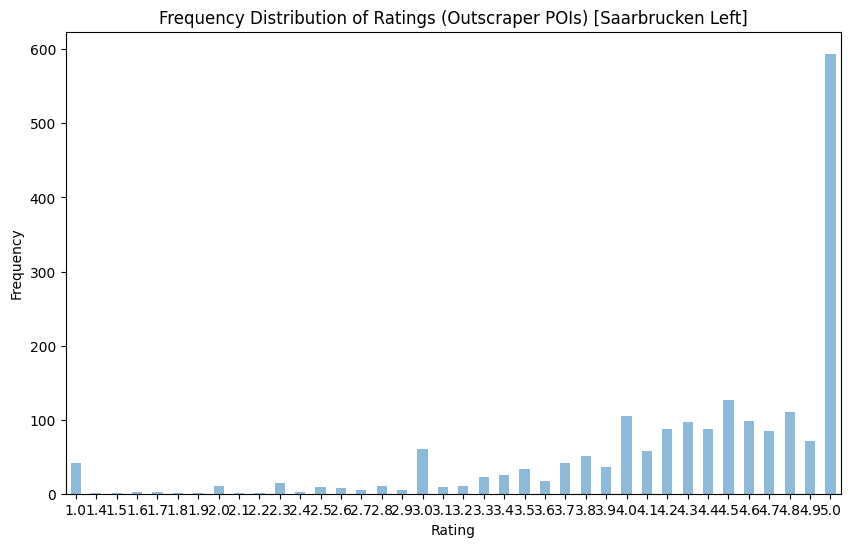

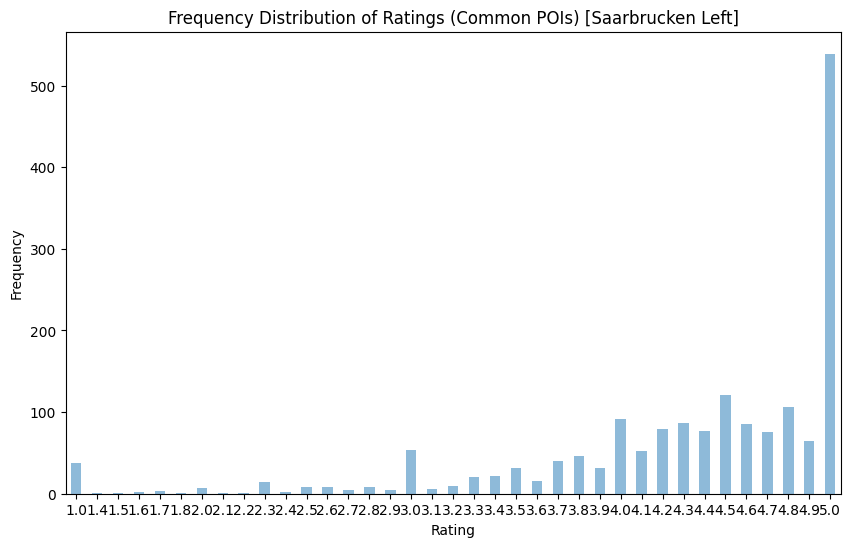

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the CSV files
csv_files = [
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\threshold_5\saarbrucken_left_filtered_pois_within_boundary(with_ratings_reviews).csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\saarbrucken_left_half_filtered.csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\saarbrucken_left_half_google_outscraper_common_pois.csv'
]

# Titles for each plot
titles = [
    'Frequency Distribution of Ratings (Google POIs) [Saarbrucken Left]',
    'Frequency Distribution of Ratings (Outscraper POIs) [Saarbrucken Left]',
    'Frequency Distribution of Ratings (Common POIs) [Saarbrucken Left]'
]

# Read each CSV file and calculate the frequency distribution of the 'rating' column
for csv_file, title in zip(csv_files, titles):
    df = pd.read_csv(csv_file)
    rating_distribution = df['rating'].value_counts().sort_index()
    
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    rating_distribution.plot(kind='bar', alpha=0.5)
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Display the plot
    plt.show()

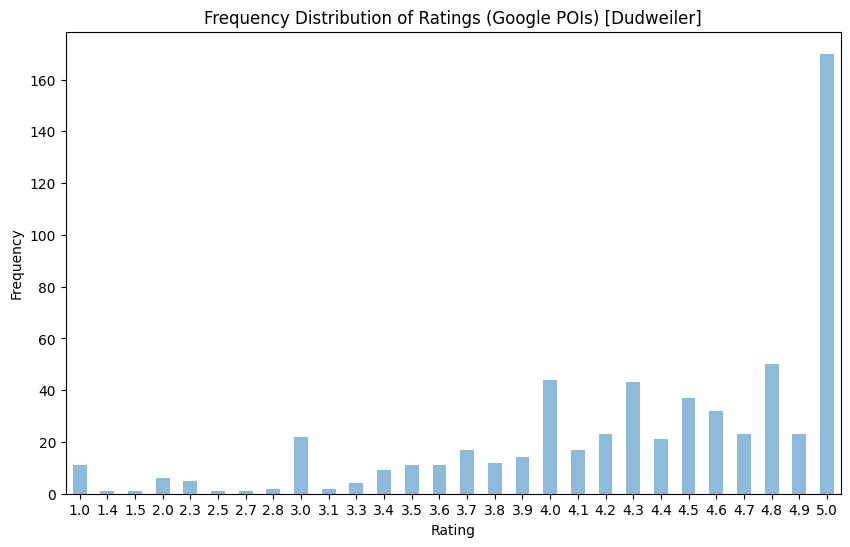

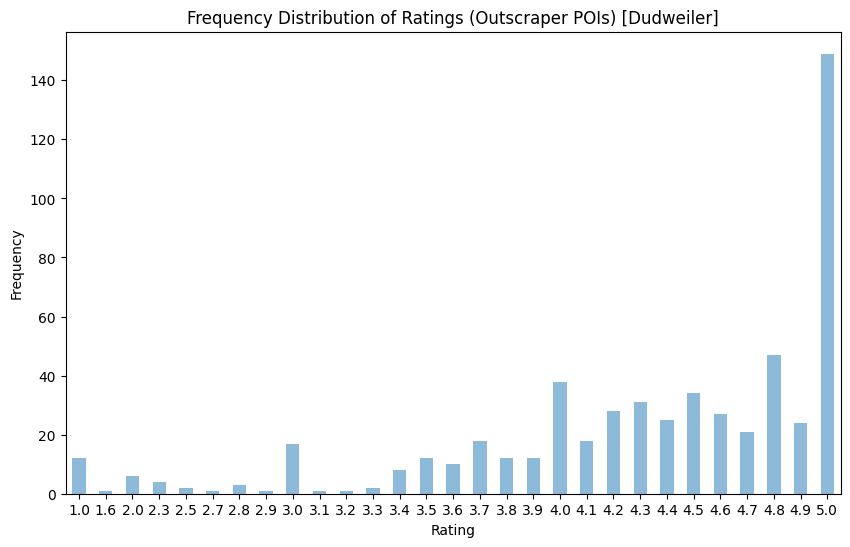

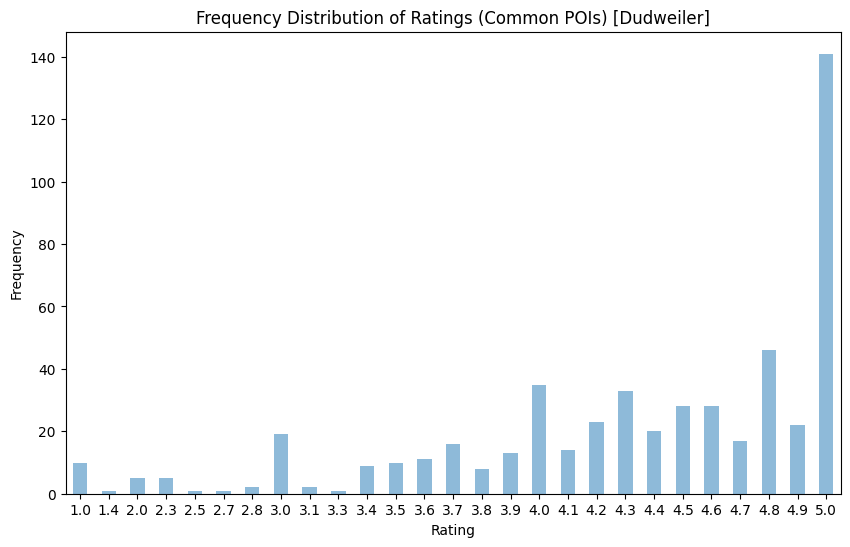

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the CSV files
csv_files = [
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\threshold_5\dudweiler_filtered_pois_within_boundary(with_ratings_reviews).csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\dudweiler_filtered_data_outscraper.csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\dudweiler_google_outscraper_common_pois.csv'
]

# Titles for each plot
titles = [
    'Frequency Distribution of Ratings (Google POIs) [Dudweiler]',
    'Frequency Distribution of Ratings (Outscraper POIs) [Dudweiler]',
    'Frequency Distribution of Ratings (Common POIs) [Dudweiler]'
]

# Read each CSV file and calculate the frequency distribution of the 'rating' column
for csv_file, title in zip(csv_files, titles):
    df = pd.read_csv(csv_file)
    rating_distribution = df['rating'].value_counts().sort_index()
    
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    rating_distribution.plot(kind='bar', alpha=0.5)
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Display the plot
    plt.show()